# Diferenciální rovnice druhého řádu


Budeme studovat jednorozměrnou difuzní rovnici se spotřebiči úměrnými stavové veličině a v homogenním prostředí, tj. rovnici $$\frac{\partial u}{\partial t}=-ku+D\frac{\partial ^2u}{\partial x^2},$$ kde $k$ a $D$ jsou konstanty. 

* Model odpovídá například rozložení teploty v tyči, kde se teplo předává do okolí rychlostí úměrnou teplotě. Například žebro chladiče v jednodimenzionálním přiblížení. 
* Jiný model, který nás přivede ke stejné rovnici, je model difuze radonu, který se rozpadá rychlostí úměrnou množství tohoto prvku.
* V systémové biologii tato rovnice popisuje morfogen. To je transkripční faktor, který je uložen na určitém místě embrya vyvíjejícího se živočicha, šíří se prostředím a degraduje. Z gradientu kocentrace dvou morfogenů zárodečné buňky poznají svou polohu v embryu. Poznají, na buňky jaké tkáně se mají přeměnit. Viz [https://www.prf.jcu.cz/zmb/menu/vyvojova-biologie.html](https://www.prf.jcu.cz/zmb/menu/vyvojova-biologie.html).

Budeme hledat stacionární řešení, tj. rovnice se zjednoduší na rovnici
$$-ku+D\frac{\mathrm d ^2u}{\mathrm d x^2}=0.$$
Jedná se o diferenciální rovnici druhého řádu s konstantními koeficienty. Obecným řešením této rovnice je funkce 
$$ u=C_1 e^{-\sqrt{\frac{k}D}x}+C_2e^{\sqrt{\frac{k}D}x}.$$
My se budeme sna6it tuto rovnici vyřešit společně s okrajovými podmínkami. To se dá udělat i analyticky, pokusíme se však o numerické řešení.

Knohovna SciPy vyžaduje přepsat rovnici vyššího řádu na systém rovnic prvního řádu. Naši rovnici je možno přepsat na systém
$$\begin{aligned}\frac{\mathrm d u}{\mathrm d x}&=v\cr
\frac{\mathrm d v}{\mathrm d x}&=\frac{k}{D}u.\end{aligned}$$


In [25]:
import numpy
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def fun(X, Y):
    global k,D       # konstanty k a D použijeme globální
    u,v = Y          # identifikace komponent řešení
    return numpy.vstack((v, (k)/D*u))  # pravé strany rovnic jako sloupcový vektor

x = numpy.linspace(0, 1, 15)
y = numpy.zeros((2, x.size))
x_plot = numpy.linspace(0, 1, 100)   # interval pro kreslení grafu na 100 dílků

## Smíšená okrajová úloha


Budeme uvažovat okrajové podmínky $u(0)=100$ a $\frac{\mathrm du}{\mathrm dx}(1)=0.$ Okrajové podmínky vyjadřují, že levý konec je udržován na konstantní teplotě a pravý konec neodevzdává teplo do okolí. Pro systém je můžeme přepsat do tvaru $$\begin{aligned}u(a)-100&=0\cr v(1)&=0.\end{aligned}$$ Pro $k=0$ se jedná o vedení tepla v homogenním prostředí bez spotřebičů a očekáváme konstantní profil. Pro $k>0$ je podél tyče předáváno teplo do okolí a teplota klesá. Podle velikosti koeficientu $k$ klesne teplota na pravém konci hodně nebo málo. Větší hodnota $k$ vede ze zkušeností k rychlejšímu poklesu teploty.

Jiný model, který nás přivede ke stejné rovnici, je model difuze radonu, který se rozpadá rychlostí úměrnou množství tohoto prvku.

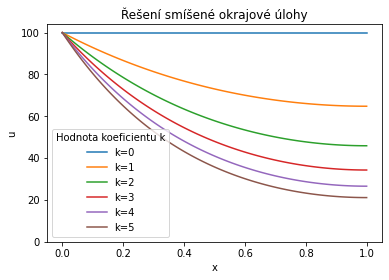

In [26]:
D=1

def bc2(Ya, Yb):
    # Ya je řešení v levém krajním bodě
    # Ya[0] je první komponenta tohoto řešení, tj. u
    # v levém bodě je u=100, tj. nuluje se funkce Ya[0]-100
    # Yb je řešení v pravém krajním bodě
    # Yb[1] je druhá komponenta tohoto řešení, tj. v, což je du/dx
    # v pravém bodě je du/dx=0, tj. nuluje se funkce Yb[1]
    return numpy.array([Ya[0]-100, Yb[1]])

for k in (0,1,2,3,4,5):
    sol = solve_bvp(fun, bc2, x, y)
    y_plot = sol.sol(x_plot)[0]
    plt.plot(x_plot, y_plot, label = "k=%s"%k)
    
plt.xlabel("x")
plt.ylabel("u")
plt.ylim(0)
plt.legend(title="Hodnota koeficientu k")
plt.title("Řešení smíšené okrajové úlohy")
plt.show()

## Dirichletova okrajová úloha

Budeme uvažovat okrajové podmínky $u(0)=100$ a $u(1)=0.$ Tyto podmínky vyjadřují, že oba konce jsou udržovány na konstantní teplotě, každý na jiné. Pro $k=0$ se jedná o vedení tepla v homogenním prostředí a očekáváme lineární profil. Pro $k>0$ je podél tyče předáváno teplo do okolí a teplota klesá rychleji.



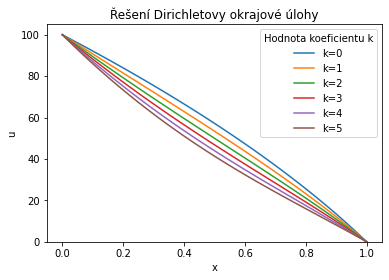

In [45]:
D=1

def bc(Ya, Yb):  # Okrajové podmínky
    return numpy.array([Ya[0]-100, Yb[0]])

for k in (0,1,2,3,4,5):
    sol = solve_bvp(fun, bc, x, y)
    y_plot = sol.sol(x_plot)[0]
    plt.plot(x_plot, y_plot, label = "k=%s"%k)
    
plt.xlabel("x")
plt.ylabel("u")
plt.ylim(0)
plt.legend(title="Hodnota koeficientu k")
plt.title("Řešení Dirichletovy okrajové úlohy")
plt.show()

## Nekonstantní součinitel tepelné vodivosti

Popsanou analýzu můžeme udělat i s nekonstantním součinitelem tepelné vodivosti $D$, což by se nám v obecném případě provádělo již hůře. Stacionární rovnice je 
$$-kT+\frac{\mathrm d }{\mathrm d x}\left(D\frac{\mathrm d T}{\mathrm d x}\right)=0.$$
Například pokud součinitel tepelné vodivosti s teplotou roste, očekáváme při větší teplotě intenzivnější předávání tepla a tedy i menší teplotní rozdíly. Proto by pro velké teploty křivka neměla klesat tak rychle. Vyjde to z modelu?


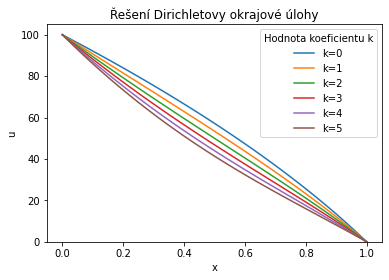

In [44]:
def fun(X, Y):
    global k         # konstantu k použijeme globální
    u,v = Y          # identifikace komponent řešení
    return numpy.vstack((1/(1.2+0.01*u)*v, (k)*u))  # pravé strany rovnic jako sloupcový vektor
    # soucinitel vodivosti roste s teplotou u podle vzorce 1.2+0.01*u

def bc(Ya, Yb):  # Okrajové podmínky
    return numpy.array([Ya[0]-100, Yb[0]])

for k in (0,1,2,3,4,5):
    sol = solve_bvp(fun, bc, x, y)
    y_plot = sol.sol(x_plot)[0]
    plt.plot(x_plot, y_plot, label = "k=%s"%k)
    
plt.xlabel("x")
plt.ylabel("u")
plt.ylim(0)
plt.legend(title="Hodnota koeficientu k")
plt.title("Řešení Dirichletovy okrajové úlohy")
plt.show()

## Literatura

1. Tomáš Doležal, Vývojová biologie, online [https://www.prf.jcu.cz/zmb/menu/vyvojova-biologie.html](https://www.prf.jcu.cz/zmb/menu/vyvojova-biologie.html) (2.4.2021)